<a href="https://colab.research.google.com/github/Himanshu-1703/Feature-Engineering/blob/main/Imputations/Missing_values_Categorical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Arbitrary Value imputation:

It consists of replacing missing values with arbitrary values.</br>
This technique was derived from kaggle competion.</br>
The arbitrary value is actually not part of the data is a different value from the dataset.

- We can take the last outliers in the data.
- We can use a value that is extreme and not in the dataset.


In [ ]:
path = '/content/drive/MyDrive/csv files/titanic_krish.csv'
df = pd.read_csv(path,usecols=['Age','Fare','Survived'])

df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


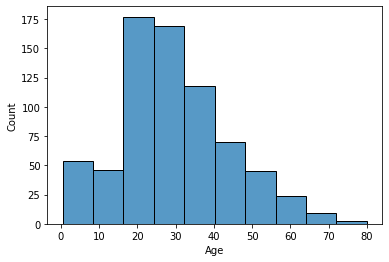

In [ ]:
# plot histogram of age

sns.histplot(x='Age',bins=10,data=df)
plt.show()

In [ ]:
# fill the values with an arbitrary age of 100

from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='constant',fill_value=100)

df['Age_imputed'] = si.fit_transform(df[['Age']])

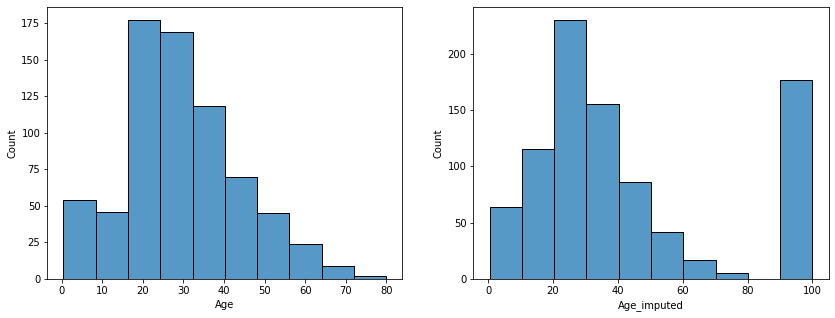

In [ ]:
# plot histogram of age
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(x='Age',bins=10,data=df)

plt.subplot(1,2,2)
sns.histplot(x='Age_imputed',bins=10,data=df)
plt.show()

#### Advantages:
1. Capture the nan values in the data

#### Disadvantages:
1. Distorts the original distribution of the data.
2. Hard to decide which value to use.

# Categorical features

In [ ]:
path = '/content/drive/MyDrive/csv files/house price prediction.csv'

df = pd.read_csv(path,usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
# check for missing values

df.isna().mean().sort_values(ascending=False)

FireplaceQu    0.472603
GarageType     0.055479
BsmtQual       0.025342
SalePrice      0.000000
dtype: float64

### Replace with most frequent category

- Replace the categorical feature with the most frequent category.
- This technique is used when the data missing in the column is very less in the range of 5 percent or less.
- It does not distort the distribution of categories in the data if the data missing is less.

In [ ]:
si = SimpleImputer(strategy='most_frequent')

The columns selected are `GarageType` and `BsmtQual` because the percentage of missing value is less than 5 percent and can be used for most frequent imputation.

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

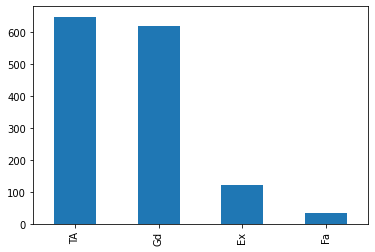

In [ ]:
# do value counts
display(df['BsmtQual'].value_counts())
df['BsmtQual'].value_counts().plot(kind='bar')
plt.show()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

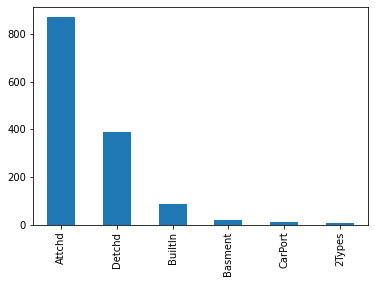

In [ ]:
display(df['GarageType'].value_counts())
df['GarageType'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
# impute the most frequent category

df[['BsmtQual_imputed','GarageType_imputed']] = si.fit_transform(df[['BsmtQual','GarageType']])

In [ ]:
# check for missing values again

df.isna().mean()

BsmtQual              0.025342
FireplaceQu           0.472603
GarageType            0.055479
SalePrice             0.000000
BsmtQual_imputed      0.000000
GarageType_imputed    0.000000
dtype: float64

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual_imputed, dtype: int64

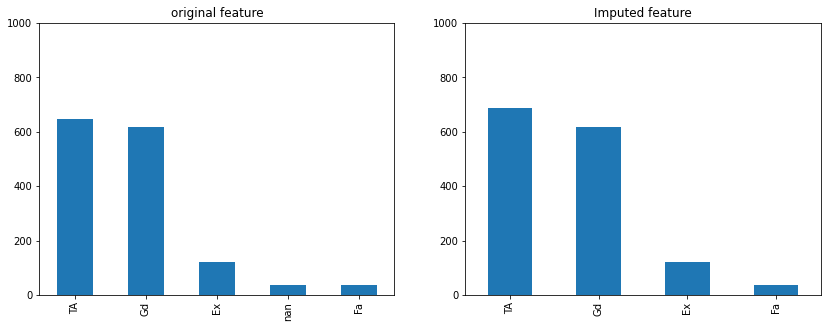

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
display(df['BsmtQual'].value_counts(dropna=False))
df['BsmtQual'].value_counts(dropna=False).plot(kind='bar')
plt.ylim(0,1000)
plt.title('original feature')

plt.subplot(1,2,2)
display(df['BsmtQual_imputed'].value_counts(dropna=False))
df['BsmtQual_imputed'].value_counts(dropna=False).plot(kind='bar')
plt.ylim(0,1000)
plt.title('Imputed feature')
plt.show()

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType_imputed, dtype: int64

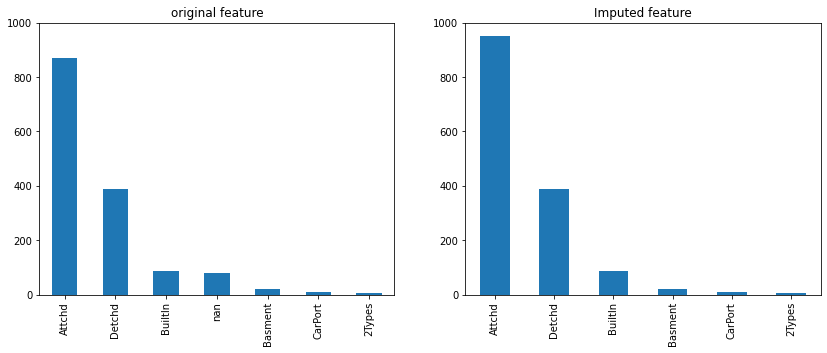

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
display(df['GarageType'].value_counts(dropna=False))
df['GarageType'].value_counts(dropna=False).plot(kind='bar')
plt.ylim(0,1000)
plt.title('original feature')

plt.subplot(1,2,2)
display(df['GarageType_imputed'].value_counts(dropna=False))
df['GarageType_imputed'].value_counts(dropna=False).plot(kind='bar')
plt.ylim(0,1000)
plt.title('Imputed feature')
plt.show()

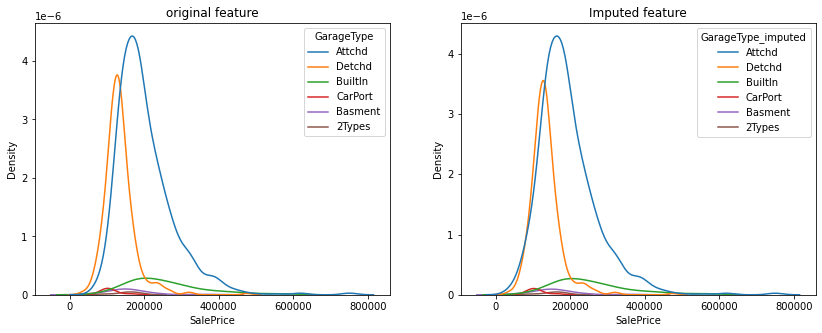

In [ ]:
# plot the distribution of categories


plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.kdeplot(x='SalePrice',data=df[['GarageType','SalePrice']],hue='GarageType')
plt.title('original feature')

plt.subplot(1,2,2)
sns.kdeplot(x='SalePrice',data=df[['GarageType_imputed','SalePrice']],hue='GarageType_imputed')
plt.title('Imputed feature')
plt.show()

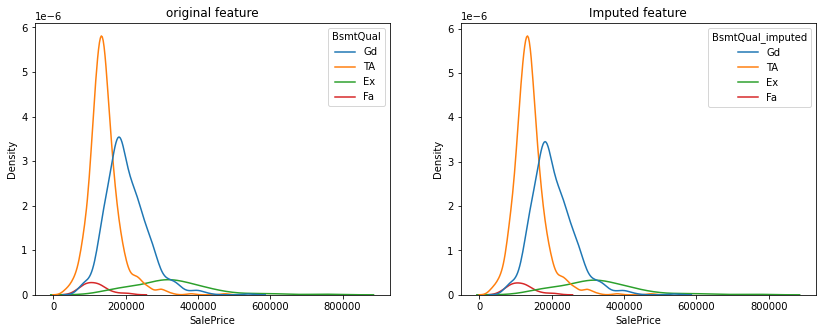

In [ ]:

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.kdeplot(x='SalePrice',data=df[['BsmtQual','SalePrice']],hue='BsmtQual')
plt.title('original feature')

plt.subplot(1,2,2)
sns.kdeplot(x='SalePrice',data=df[['BsmtQual_imputed','SalePrice']],hue='BsmtQual_imputed')
plt.title('Imputed feature')
plt.show()

#### Advantages:
1. Faster way to implement.

#### Disadvantages:
1. It may overrepresent a category of the NaN value percentage is very high.

**When not to use most frequent category**

In [ ]:
si_fire = SimpleImputer(strategy='most_frequent')

df['FireplaceQu_imputed'] = si.fit_transform(df[['FireplaceQu']])

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

Gd    1070
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu_imputed, dtype: int64

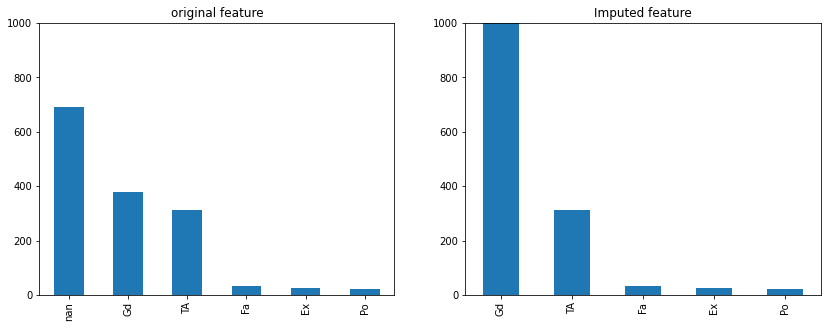

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
display(df['FireplaceQu'].value_counts(dropna=False))
df['FireplaceQu'].value_counts(dropna=False).plot(kind='bar')
plt.ylim(0,1000)
plt.title('original feature')

plt.subplot(1,2,2)
display(df['FireplaceQu_imputed'].value_counts(dropna=False))
df['FireplaceQu_imputed'].value_counts(dropna=False).plot(kind='bar')
plt.ylim(0,1000)
plt.title('Imputed feature')
plt.show()

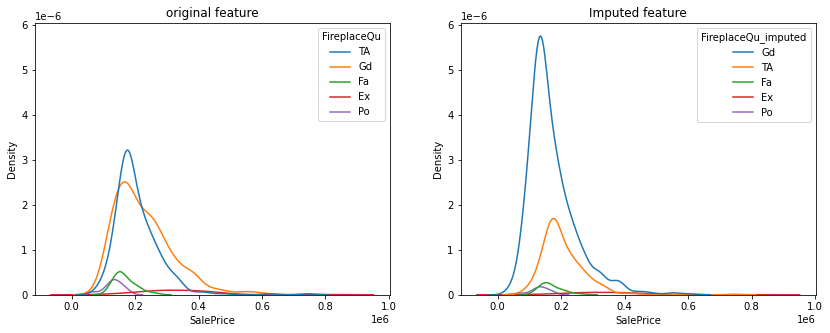

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.kdeplot(x='SalePrice',data=df[['FireplaceQu','SalePrice']],hue='FireplaceQu')
plt.ylim(y_lim)
plt.title('original feature')

plt.subplot(1,2,2)
sns.kdeplot(x='SalePrice',data=df[['FireplaceQu_imputed','SalePrice']],hue='FireplaceQu_imputed')
plt.ylim(y_lim)
plt.title('Imputed feature')

plt.show()

In [ ]:
y_lim

(0.0, 6.043565155689643e-06)

**When the percentage of missing values are very high then it changes the distribution of the column**

### Impute using missing indicator

In [ ]:
path = '/content/drive/MyDrive/csv files/house price prediction.csv'

df = pd.read_csv(path,usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
from sklearn.impute import MissingIndicator

In [ ]:
X = df.drop(columns='SalePrice')

In [ ]:
# use the missing indicator for imputation

mi = MissingIndicator()
X[['BsmtQual_imputed','FireplaceQu_imputed','GarageType_imputed']] = mi.fit_transform(X[['BsmtQual','FireplaceQu','GarageType']])

In [ ]:
# perform count of missing values

original_cols = ['BsmtQual','FireplaceQu','GarageType']
imputed_cols = ['BsmtQual_imputed','FireplaceQu_imputed','GarageType_imputed']

for i in range(3):
    print('The column is',original_cols[i])
    print('The missing values are',X[original_cols[i]].isna().sum())
    print('The missing indicator are',X[imputed_cols[i]].sum())
    print()

The column is BsmtQual
The missing values are 37
The missing indicator are 37

The column is FireplaceQu
The missing values are 690
The missing indicator are 690

The column is GarageType
The missing values are 81
The missing indicator are 81



### Generate new category for missing values:

- Here the new category of missing value is created and then encoded afterwards in the feature engineering.

In [ ]:
path = '/content/drive/MyDrive/csv files/house price prediction.csv'

df = pd.read_csv(path,usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
X = df.drop(columns='SalePrice')

In [ ]:
si_missing = SimpleImputer(strategy='constant',fill_value='missing')

X[['BsmtQual_imputed','FireplaceQu_imputed','GarageType_imputed']] = si_missing.fit_transform(X[['BsmtQual','FireplaceQu','GarageType']])


In [ ]:
# perform value counts

for i in range(3):
    print('The column is',original_cols[i])
    print('The value counts of NaN in original')
    print(X[original_cols[i]].value_counts(dropna=False).loc[np.nan])
    print('The value counts after imputation')
    print(X[imputed_cols[i]].value_counts(dropna=False).loc['missing'])
    print()

The column is BsmtQual
The value counts of NaN in original
37
The value counts after imputation
37

The column is FireplaceQu
The value counts of NaN in original
690
The value counts after imputation
690

The column is GarageType
The value counts of NaN in original
81
The value counts after imputation
81

